In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
#Loading the dataset

mnist= tf.keras.datasets.mnist

In [3]:
#Dividing the images and their outputs into x_train and x_test sets

(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


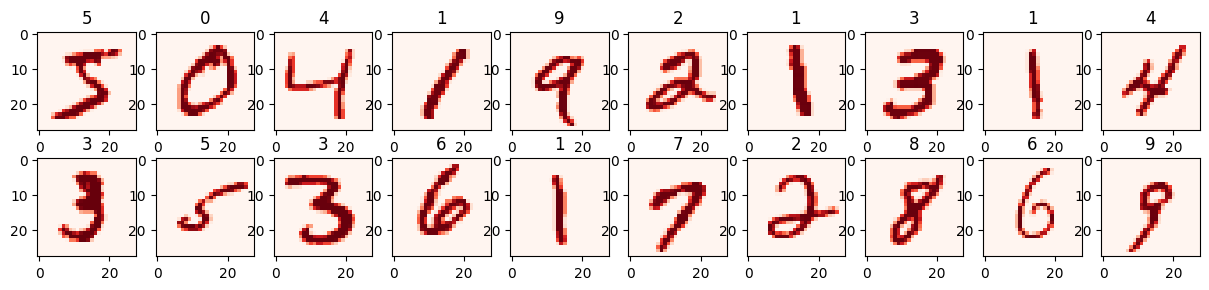

In [4]:
#Cheking the data set images, which needed to be identified by the neural network

fig=plt.figure(figsize=(15,3))
for i in range(20):
  ax=fig.add_subplot(2,10,i+1)
  ax.imshow(np.squeeze(x_train[i]),cmap='Reds')
  ax.set_title(y_train[i])

In [5]:
#Printing the data images into metrics form

print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [6]:
#Normalizing the matrix array of number images

xtrain = x_train/255.0
xtest = x_test/255.0

In [7]:
#Flattening the 2-dimensional array into one dimensional array or a single column; which will behave as 1st inpur layer for neural network

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation ='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
#Using of AdamOptimizer

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss ='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [10]:
#Fitting of the training data into the model for 5 iterations

model.fit(xtrain,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2597 - accuracy: 0.9254
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1114 - accuracy: 0.9668
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0773 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0585 - accuracy: 0.9816
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0460 - accuracy: 0.9854


In [11]:
#98% Accuracy achieved with 5 iterations
#Fitting of the training data into the model for 9 iterations
model.fit(xtrain,y_train, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0348 - accuracy: 0.9892
Epoch 2/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0277 - accuracy: 0.9913
Epoch 3/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 4/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0174 - accuracy: 0.9947
Epoch 5/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0167 - accuracy: 0.9944
Epoch 6/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0123 - accuracy: 0.9964
Epoch 7/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0110 - accuracy: 0.9968
Epoch 8/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0105 - accuracy: 0.9966
Epoch 9/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0096 - accuracy: 0.9970


In [12]:
#99% Accuracy achieved with 9 iterations

print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 22.0757 - accuracy: 0.9756
[22.07571792602539, 0.975600004196167]


In [13]:
#97 % of total accuracy of our neural network has been achieved
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 5.5718 - accuracy: 0.9890 - val_loss: 4.1774 - val_accuracy: 0.9917
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 2.1080 - accuracy: 0.9937 - val_loss: 2.2540 - val_accuracy: 0.9952
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 2.0039 - accuracy: 0.9941 - val_loss: 3.5466 - val_accuracy: 0.9932
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 1.6660 - accuracy: 0.9951 - val_loss: 6.2820 - val_accuracy: 0.9883
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 2.2224 - accuracy: 0.9941 - val_loss: 2.8656 - val_accuracy: 0.9935
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 1.4249 - accuracy: 0.9955 - val_loss: 4.1063 - val_accuracy: 0.9897
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 1.7045 - accuracy: 0.9948 - val_loss: 3.9016 - val_accuracy:

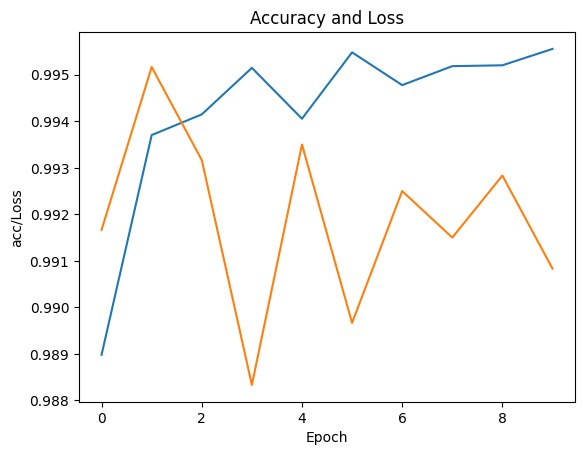

In [14]:
#Plotting Accuracy of Model

plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history["val_accuracy"],label='val')
plt.show()

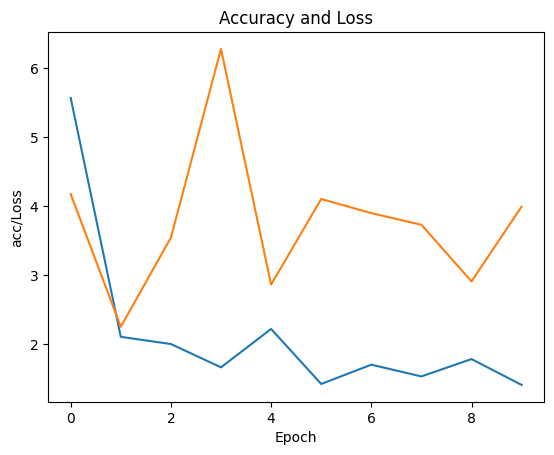

In [15]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['loss'],label='acc')
plt.plot(history.history["val_loss"],label='val')
plt.show()

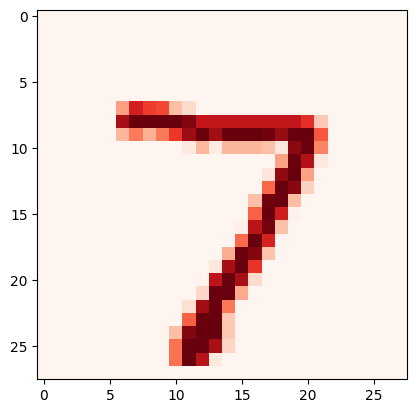

In [16]:
#Testing Our Model

plt.imshow(np.squeeze(x_test[0]),cmap="Reds")

In [17]:
prediction=model.predict(x_test)
print(np.argmax(prediction[0]))

313/313 [==============================] - 1s 2ms/step
7


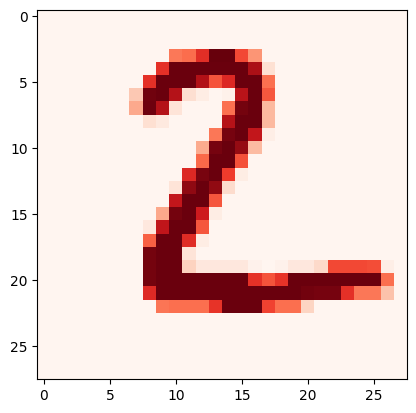

In [18]:
plt.imshow(np.squeeze(x_test[1]),cmap="Reds")

In [19]:
prediction=model.predict(x_test)
print(np.argmax(prediction[1]))

313/313 [==============================] - 1s 2ms/step
2


# THANK YOU